# Examen final 

## módulo 5 

## Erick Iván Castro Granados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn, seed
from scipy.optimize import minimize

In [4]:
%config InlineBackend.figure_format = "retina"

In [7]:
## Datos iniciales
tasa_lriesgo = 0.05 
premio_rm = 0.10 
A = 3  # nivel de aversión al riesgo 

In [16]:
port_path = "Prueba.xlsx"
market = pd.read_excel(port_path, index_col=0)
market.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [88]:
### Acciones seleccionadas
acciones = ["ASURB", "GFNORTEO", "GMEXICOB", "AMXL", "MEGACPO", "GCC*", "WALMEX*" ]

rendimientos = market.pct_change().dropna(axis=0)
rendimientos.columns = [col.replace(" MF Equity", "") for col in rendimientos.columns]
rend_portafolio = rendimientos[acciones]

## 1.- Rendimiento esperado diario y anual 
### a) Modelo de rendimiento promedio constante

In [72]:
## Rendimiento diario
rend_diario = rend_portafolio.mean()
print(f"El rendimiento diario de ASURB = {rend_diario[0]:,.4%}")
print(f"El rendimiento diario de GFNORTEO = {rend_diario[1]:,.4%}")
print(f"El rendimiento diario de GMEXICOB = {rend_diario[2]:,.4%}")
print(f"El rendimiento diario de AMXL = {rend_diario[3]:,.4%}")
print(f"El rendimiento diario de MEGACPO = {rend_diario[4]:,.4%}")
print(f"El rendimiento diario de GCC* = {rend_diario[5]:,.4%}")
print(f"El rendimiento diario de WALMEX* = {rend_diario[6]:,.4%}")

El rendimiento diario de ASURB = 0.0102%
El rendimiento diario de GFNORTEO = 0.0193%
El rendimiento diario de GMEXICOB = 0.0260%
El rendimiento diario de AMXL = 0.0151%
El rendimiento diario de MEGACPO = 0.0206%
El rendimiento diario de GCC* = 0.0262%
El rendimiento diario de WALMEX* = 0.0493%


In [74]:
## Rendimiento anual 
rend_anual = rend_portafolio.mean()*252
print(f"El rendimiento anual de ASURB = {rend_anual[0]:,.4%}")
print(f"El rendimiento anual de GFNORTEO = {rend_anual[1]:,.4%}")
print(f"El rendimiento anual de GMEXICOB = {rend_anual[2]:,.4%}")
print(f"El rendimiento anual de AMXL = {rend_anual[3]:,.4%}")
print(f"El rendimiento anual de MEGACPO = {rend_anual[4]:,.4%}")
print(f"El rendimiento anual de GCC* = {rend_anual[5]:,.4%}")
print(f"El rendimiento anual de WALMEX* = {rend_anual[6]:,.4%}")

El rendimiento anual de ASURB = 2.5599%
El rendimiento anual de GFNORTEO = 4.8631%
El rendimiento anual de GMEXICOB = 6.5446%
El rendimiento anual de AMXL = 3.8057%
El rendimiento anual de MEGACPO = 5.1938%
El rendimiento anual de GCC* = 6.5943%
El rendimiento anual de WALMEX* = 12.4216%


### b) Modelo CAPM 
#### i) ¿Cuál es la beta de cada acción?

In [76]:
Phi = rendimientos.iloc[:, :-1].values
t = rendimientos.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

P = np.ones((N, M))
P = np.c_[P, Phi]

In [77]:
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([rendimientos.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")

In [78]:
B.loc[acciones]["beta"]

security
ASURB       0.300818
GFNORTEO    0.305996
GMEXICOB    0.265880
AMXL        0.432599
MEGACPO     0.169574
GCC*        0.213326
WALMEX*     0.294421
Name: beta, dtype: float64

#### ii) Clasifica las acciones en defensivas y agresivas

Como todas las betas son menores a 1, entonces todas las acciones son defensivas, lo que significa que la acción registra una menor variabilidad que su indice de referencia (MEXBOL), o posee para el mercado un menor riesgo.

In [79]:
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [94]:
N, M = rend_portafolio.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rend_portafolio) - E # == 0


constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend_portafolio)
port0

     fun: 0.13037955911151453
     jac: array([0.13019519, 0.13066219, 0.12999726, 0.12993868, 0.13059618,
       0.13058146, 0.13038693])
 message: 'Optimization terminated successfully.'
    nfev: 109
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 0.14707726, -0.01290955,  0.05629077,  0.12497931,  0.2498886 ,
        0.25729844,  0.17737517])

In [95]:
pesos = port0.x
port_rend(pesos, rend_portafolio), port_vol(pesos, rend_portafolio)

(0.0635561336981203, 0.13037955911151453)

## 2.- Matriz varianza-covarianza

In [86]:
rend_portafolio.cov()

,ASURB,GFNORTEO,GMEXICOB,AMXL,MEGACPO,GCC*,WALMEX*
ASURB,0.000229,0.000095,0.000075,0.000069,0.000018,0.000040,0.000042
GFNORTEO,0.000095,0.000381,0.000082,0.000099,0.000051,0.000050,0.000089
GMEXICOB,0.000075,0.000082,0.000318,0.000080,0.000026,0.000052,0.000053
AMXL,0.000069,0.000099,0.000080,0.000193,0.000042,0.000040,0.000051
MEGACPO,0.000018,0.000051,0.000026,0.000042,0.000198,0.000019,0.000025
GCC*,0.000040,0.000050,0.000052,0.000040,0.000019,0.000171,0.000031
WALMEX*,0.000042,0.000089,0.000053,0.000051,0.000025,0.000031,0.000219


# Utilizando los rendimientos esperados bajo el modelo CAPM, construye:
## 3.- Frontera de carteras de mínima varianza y frontera eficiente / graficar  

In [103]:
r_min = port_rend(pesos, rend_portafolio)
r_max = rend_anual.max()

rend_max = np.linspace(r_min, r_max)

In [104]:
pesos_optimos = []
for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=rend_portafolio)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

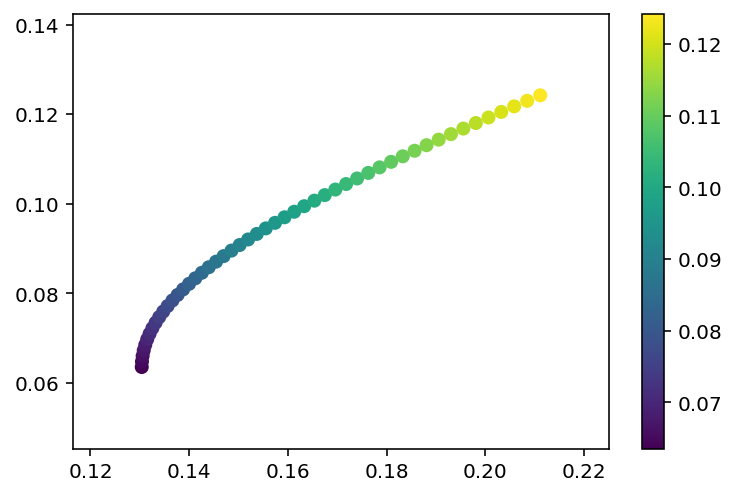

In [105]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend_portafolio))
    v_opt.append(port_vol(w, rend_portafolio))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar()

## 4.- Encuentra el portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

In [116]:
rf = 0.05

def min_func_sharpe(weights):
    return - (port_rend(weights, rend_portafolio) - rf) / port_vol(weights, rend_portafolio)

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [117]:
w_sharpe = f_sharpe.x
w_sharpe

array([-0.75814733, -0.23305448,  0.24096712, -0.61876768, -0.00879561,
        0.42330533,  1.95449265])

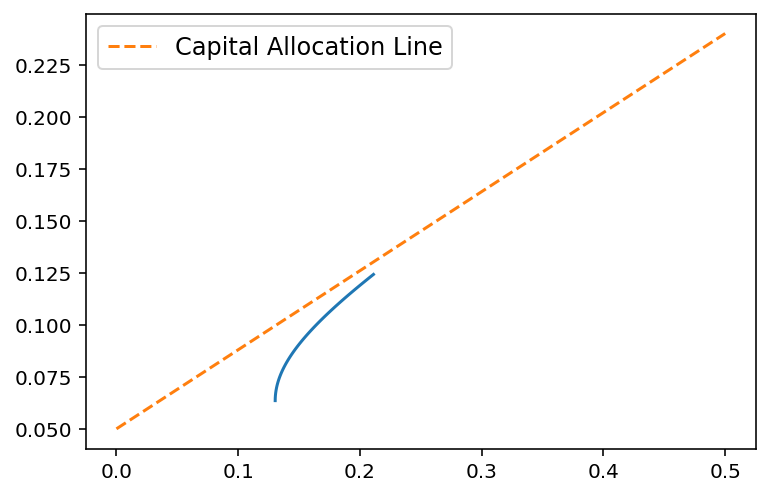

In [118]:
e_sharpe = port_rend(w_sharpe, rend_portafolio)
vol_sharpe = port_vol(w_sharpe, rend_portafolio)

sigma_c =  np.linspace(0, 0.50)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

In [119]:
e_sharpe, vol_sharpe

(0.2317170544754409, 0.4781488895043789)

## 5.- Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo

In [120]:
A = 3
y_star = (e_sharpe-rf)/(A*vol_sharpe**2)
y_star

0.26494036536409776

In [121]:
E_util = rf + y_star * (e_sharpe-rf)
V_util = y_star * vol_sharpe

In [122]:
print(f"E[sharpe]={e_sharpe:0.3}")
print(f"V[sharpe]={vol_sharpe:0.3}")

E[sharpe]=0.232
V[sharpe]=0.478


In [123]:
print(f"E[u]={E_util:0.3}")
print(f"V[u]={V_util:0.3}")

E[u]=0.0981
V[u]=0.127


# Deep Learning

## 6.- ¿En qué escenarios ocuparías una red neuronal? 

Cuando existe dependencia no lineal entre los datos, los escenarios más comúnes en los que se utilizan las redes neuronales son: en la elección de muestras de un grupo más grande de las mismas, clasificación de una muestra desconocida en clases predefinidas anteriormente, clustering que es encontrar la estructura interna del espacio de medición al que pertenecen las muestras, y por último, crear modelos para predecir el comportamiento o el efecto de una muestra desconocida de una manera cuantitativa. 

## 7.- ¿En qué escenarios no ocuparías una red neuronal?

No usaría una red neuronal cuando existe dependencia lineal entre los datos de entrada y los outputs, las redes neuronales pueden usarse cuando existe una relación linial también pero el resultado no es el mejor y se opta por utilizar otro tipo de metodos estadísticos. Es importante tomar en cuenta la naturaleza de los datos del problema, si se requiere un metodo supervisado o no supervisado.

## 8.- Menciona tres funciones de activación para una red neuronal feed-forward 

Una función de activación es aquella función no lineal que ayuda a transformar el espacio, las tres que hemos visto son:
* Función sigmoidal,  $\sigma(x)=\frac{1}{1+\exp(x)}$\\
* $Tan hip (x) =\frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x)} $
* $ReLu = max(0,x)$

## 9.- ¿Qué es el método backpropagation?

Algoritmo introducido por Geoff Hint, diseñado para entrenar una red neuronal. \\
Utiliza una expresión para las derivadas parciales de la función de costo con respecto a los pesos de la red neuronal. Esta epresión nos dice que tan rápido cambia la funcón de costos cuando variamos los pesos y los sesgos.
El algoritmo consiste en que nosotros tenemos tenemos inicialmente la función de costos, y sabemos sacar sus derivadas, entonces podemos "propagar" el error desde el final hasta el inicio (regla de la cadena).

## 10.- ¿En qué difiere una red neuronal feed-forward de una red neuronal convucional?

Una red neuronal convucional es un algoritmo que pueda incorporar una imagen de entrada, asignarle importancia (pesos) a varios aspectos de la imagen y ser capaz de diferenciar uno de otro. El procesamiento requerido es mucho menor en comparación con otros algoritmos de clasificación. Es capaz de capturar las dependencias espaciales y temporales en una imagen mediante la aplicación de filtros, la arquitectura se adapta mejor al conjunto de datos de la imagen debido a la reducción del número de parámetros involucrados y la reutilización de pesos (ciclo). 
A diferencia de la red neuronal feed-forward que es aquella donde las conexiones no forman un ciclo, la información se mueve en una única dirección (adelante) desde los nodos de entrada, pasando por los hidden layers y termina en los nodos de salida. 